## Author : Dimgba Martha Otisi
### @martha_samuel_

### score = 0.8308659

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, log_loss
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
import catboost 
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
df= pd.read_csv('Train1.csv')
df_Test = pd.read_csv('Test1.csv')
#print(df.head(3))
df_sample=pd.read_csv("SampleSubmission1.csv")


In [ ]:
df_user = df.pop('Applicant_ID')
df_Test_user =df_Test.pop('Applicant_ID')


In [ ]:
# combine both test and train to 
df_Test['default_status']=-1

data = pd.concat((df, df_Test)).reset_index(drop=True)
print(df.shape, df_Test.shape, data.shape)
data.head()

In [ ]:
data.info()

In [ ]:
data.isna().sum()#checks for number of missing data

In [ ]:
#mapping and converting categoricals 
data['form_field47']= data['form_field47'].map({'charge':0, 'lending':1}, na_action= 'ignore')

data['default_status']= data['default_status'].map({'yes':1, 'no':0}, na_action= 'ignore')


In [ ]:
#data.describe()
data['form_field36'].mean()

In [ ]:
np.all(np.isfinite(data))#this shows there is infinity

In [ ]:
data.columns

### feature engineering


In [ ]:
data.form_field17=data.form_field17.combine_first(data.form_field18)#it takes values from 18
#print(df.form_field18)
data.form_field17.isna().sum()
#df['form_field17'].fillna(method='backfill', inplace=True, axis=1)#takes values from wherever
#print(df['form_field17'])




In [ ]:
#data['form_field18'].fillna(method='ffill', inplace=True)#takes values from wherever
#print(data['form_field18'])  

data.form_field18=data.form_field18.combine_first(data.form_field17)#it takes values from 17
#print(data.form_field18)
data.form_field18.isna().sum()
#or data.form_field18=data.form_field18.fillna(data.form_field17)
#print(sum(data.form_field18))
#print(data.form_field18)



In [ ]:
data.form_field20=data.form_field20.combine_first(data.form_field19)#it takes values from 19
#print(data_Test.form_field20)
data.form_field20.isna().sum()

#df['form_field20'].fillna(method='ffill', inplace=True, axis=1)# fills from wherever
#print(df['form_field20'])



In [ ]:
data.form_field19=data.form_field19.combine_first(data.form_field20)#it takes values from 20
#print(data.form_field18)
data.form_field19.isna().sum()
#['form_field19'].fillna(method='backfill', inplace=True, axis=1)  # fills from wherever
#print(data['form_field19']) or print(data.form_field19)



In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

In [ ]:
data=data.drop(['form_field40'],axis=1)# at here,with feat.eng with -1=0.8305257. highest so far. MowopeMart1rf-1_ = MowopeMart1rf-1__

In [ ]:
data.describe()

In [ ]:
# this replaces Nan with -1
data=data.fillna(-1)

In [ ]:
dd=data.copy()
dd.drop('default_status', axis=1, inplace=True)

ddc = dd.copy()

dd.shape,ddc.shape


In [ ]:
#Checking for multi colinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dd.values, i) for i in range(dd.shape[1])]
vif["features"] = dd.columns
vif

In [454]:
#Scaling/normalizing the dataset
dd = StandardScaler().fit_transform(dd)

In [455]:
#Checking for multi colinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dd, i) for i in range(dd.shape[1])]
vif["features"] = ddc.columns
vif

,VIF Factor,features
0,1.175753,form_field2
1,3.239841,form_field3
2,3.701381,form_field5
3,1.514017,form_field6
4,2.381217,form_field8
5,2.822712,form_field9
6,1.167424,form_field11
7,1.674684,form_field12
8,1.249478,form_field13
9,1.000228,form_field14


In [456]:
corr=ddc.corr()
corr.style.background_gradient(cmap='coolwarm')

In [14]:
data['form_field17_19'] = data['form_field17'] + data['form_field19'] 
data =data.drop(['form_field17','form_field19'],axis=1)

In [15]:
data['form_field18_20'] = (data['form_field18'] + data['form_field20'])
data=data.drop(['form_field18','form_field20'],axis=1)

In [16]:
data['form_field1719_1820'] = (data['form_field17_19'] + data['form_field18_20'])
data=data.drop(['form_field17_19','form_field18_20'],axis=1)

In [17]:
data['form_field32_37'] = (data['form_field32'] + data['form_field37'])
data=data.drop(['form_field32','form_field37'],axis=1)

In [18]:
data['form_field4_46'] = data['form_field4'] + data['form_field46']
data=data.drop(['form_field4','form_field46'],axis=1)

In [19]:
data['form_field1_28'] = data['form_field1'] + data['form_field28']
data =data.drop(['form_field1','form_field28'],axis=1)

In [20]:
data['form_field26_27'] = (data['form_field26'] +  data['form_field27'])
data=data.drop(['form_field26','form_field27'],axis=1)

In [21]:
data['form_field7_10'] = (data['form_field7'] + data['form_field10'])
data=data.drop(['form_field7','form_field10'],axis=1)

In [22]:
data['form_field25_29'] = (data['form_field25'] + data['form_field29'])
data=data.drop(['form_field25','form_field29'],axis=1)

In [23]:
data=data.drop(['form_field1719_1820'],axis=1) # at thisnew point,missing is -1 =0.829, 0 as ,0=0.826

In [457]:
data=data.replace([np.inf, -np.inf], np.nan)

data=data.fillna(-1)

In [132]:
print(data.shape)
data.head(1)
data.columns

(80000, 39)


Index(['form_field2', 'form_field3', 'form_field5', 'form_field6',
       'form_field8', 'form_field9', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field30', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field38', 'form_field39', 'form_field41',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field47', 'form_field48', 'form_field49', 'form_field50',
       'default_status', 'form_field32_37', 'form_field4_46', 'form_field1_28',
       'form_field26_27', 'form_field7_10', 'form_field25_29'],
      dtype='object')

### model

In [24]:

X=data[:df.shape[0]]
X.drop('default_status', axis=1, inplace=True)
X = StandardScaler().fit_transform(X)

y = data.default_status[:df.shape[0]].copy()#map({'yes':1, 'no':0}, na_action= 'ignore')


print(len(X),len(y))
print(X.shape[1])#the no of columns
print(y.tail())
#print(X.head())

/home/martha/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


56000 56000
39
55995    0.0
55996    1.0
55997    0.0
55998    0.0
55999    0.0
Name: default_status, dtype: float64


In [25]:
x=data[df.shape[0]:].astype(float)
x.drop('default_status', axis=1,inplace=True)
x = StandardScaler().fit_transform(x)
print(len(x))

24000


In [26]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

In [ ]:
# this and the next 7 cells were run in colab

pip install scikit-optimize


Collecting scikit-optimize
  Downloading https://files.pythonhosted.org/packages/8b/03/be33e89f55866065a02e515c5b319304a801a9f1027a9b311a9b1d1f8dc7/scikit_optimize-0.8.1-py2.py3-none-any.whl (101kB)
     |████████████████████████████████| 102kB 662kB/s 
Requirement already satisfied: numpy>=1.13.3 in /usr/local/lib/python3.6/dist-packages (from scikit-optimize) (1.18.5)
Requirement already satisfied: scikit-learn>=0.20.0 in /usr/local/lib/python3.6/dist-packages (from scikit-optimize) (0.22.2.post1)
Collecting pyaml>=16.9
  Downloading https://files.pythonhosted.org/packages/15/c4/1310a054d33abc318426a956e7d6df0df76a6ddfa9c66f6310274fb75d42/pyaml-20.4.0-py2.py3-none-any.whl
Requirement already satisfied: scipy>=0.19.1 in /usr/local/lib/python3.6/dist-packages (from scikit-optimize) (1.4.1)
Requirement already satisfied: joblib>=0.11 in /usr/local/lib/python3.6/dist-packages (from scikit-optimize) (0.16.0)
Requirement already satisfied: PyYAML in /usr/local/lib/python3.6/dist-packages (from pyaml>=16.9->scikit-optimize) (3.13)
Installing collected packages: pyaml, scikit-optimize
Successfully installed pyaml-20.4.0 scikit-optimize-0.8.1

In [ ]:
pip install shap

Collecting shap
  Downloading https://files.pythonhosted.org/packages/d2/17/37ee6c79cafbd9bb7423b54e55ea90beec66aa7638664d607bcc28de0bae/shap-0.36.0.tar.gz (319kB)
     |████████████████████████████████| 327kB 2.6MB/s 
Requirement already satisfied: numpy in /usr/local/lib/python3.6/dist-packages (from shap) (1.18.5)
Requirement already satisfied: scipy in /usr/local/lib/python3.6/dist-packages (from shap) (1.4.1)
Requirement already satisfied: scikit-learn in /usr/local/lib/python3.6/dist-packages (from shap) (0.22.2.post1)
Requirement already satisfied: pandas in /usr/local/lib/python3.6/dist-packages (from shap) (1.1.2)
Requirement already satisfied: tqdm>4.25.0 in /usr/local/lib/python3.6/dist-packages (from shap) (4.41.1)
Collecting slicer
  Downloading https://files.pythonhosted.org/packages/46/cf/f37ac7f61214ed044b0df91252ab19376de5587926c5b572f060eb7bf257/slicer-0.0.4-py3-none-any.whl
Requirement already satisfied: numba in /usr/local/lib/python3.6/dist-packages (from shap) (0.48.0)
Requirement already satisfied: joblib>=0.11 in /usr/local/lib/python3.6/dist-packages (from scikit-learn->shap) (0.16.0)
Requirement already satisfied: pytz>=2017.2 in /usr/local/lib/python3.6/dist-packages (from pandas->shap) (2018.9)
Requirement already satisfied: python-dateutil>=2.7.3 in /usr/local/lib/python3.6/dist-packages (from pandas->shap) (2.8.1)
Requirement already satisfied: llvmlite<0.32.0,>=0.31.0dev0 in /usr/local/lib/python3.6/dist-packages (from numba->shap) (0.31.0)
Requirement already satisfied: setuptools in /usr/local/lib/python3.6/dist-packages (from numba->shap) (50.3.0)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.6/dist-packages (from python-dateutil>=2.7.3->pandas->shap) (1.15.0)
Building wheels for collected packages: shap
  Building wheel for shap (setup.py) ... done
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456466 sha256=54c463fb2ccd2e6e5ac530cc9b78a9bff1f09ba7cded994effeca711399f743e
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap
Installing collected packages: slicer, shap
Successfully installed shap-0.36.0 slicer-0.0.4

In [ ]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
from copy import deepcopy
import pprint
import shap
pp = pprint.PrettyPrinter(indent=4)
% matplotlib inline

In [ ]:
class ModelOptimizer:
    best_score = None
    opt = None
    
    def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=3, seed=2405, early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.categorical_columns_indices = categorical_columns_indices
        self.n_fold = n_fold
        self.seed = seed
        self.early_stopping_rounds = early_stopping_rounds
        self.is_stratified = is_stratified
        self.is_shuffle = is_shuffle
        
        
    def update_model(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self.model, k, v)
            
    def evaluate_model(self):
        pass
    
    def optimize(self, param_space, max_evals=10, n_random_starts=2):
        start_time = time.time()
        
        @use_named_args(param_space)
        def _minimize(**params):
            self.model.set_params(**params)
            return self.evaluate_model()
        
        opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
        best_values = opt.x
        optimal_values = dict(zip([param.name for param in param_space], best_values))
        best_score = opt.fun
        self.best_score = best_score
        self.opt = opt
        
        print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
        print('updating model with optimal values')
        self.update_model(**optimal_values)
        plot_convergence(opt)
        return optimal_values
 
    
class CatboostOptimizer(ModelOptimizer):
    def evaluate_model(self):
        validation_scores = catboost.cv(
        catboost.Pool(self.X_train, 
                      self.y_train, 
                      cat_features=self.categorical_columns_indices),
                      self.model.get_params(), 
                      nfold=self.n_fold,
                      stratified=self.is_stratified,
                      seed=self.seed,
                      early_stopping_rounds=self.early_stopping_rounds,
                      shuffle=self.is_shuffle,
                      plot=False)
                      
        self.scores = validation_scores
        test_scores = validation_scores.iloc[:, 1]
        best_metric = test_scores.max()
        return 1 - best_metric 
    


In [ ]:
# default param for catboost
default_cb = catboost.CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', silent=True)
default_cb_optimizer = CatboostOptimizer(default_cb, X_train, y_train)
default_cb_optimizer.evaluate_model()



Stopped by overfitting detector  (30 iterations wait)
0.16170255920956234

In [ ]:
import time
#  greedy parameter tuning
cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
                         one_hot_max_size=2,
                         loss_function='Logloss',
                         eval_metric='AUC',
                         boosting_type='Ordered', # use permutations
                         random_seed=2405, 
                         use_best_model=True,
                         silent=True)
cb_optimizer = CatboostOptimizer(cb, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate'),]
cb_optimal_values = cb_optimizer.optimize(params_space)


Stopped by overfitting detector  (30 iterations wait)
Stopped by overfitting detector  (30 iterations wait)
Stopped by overfitting detector  (30 iterations wait)
Stopped by overfitting detector  (30 iterations wait)
Stopped by overfitting detector  (30 iterations wait)
The objective has been evaluated at this point before.
Stopped by overfitting detector  (30 iterations wait)
The objective has been evaluated at this point before.
Stopped by overfitting detector  (30 iterations wait)
Stopped by overfitting detector  (30 iterations wait)
The objective has been evaluated at this point before.
Stopped by overfitting detector  (30 iterations wait)
Stopped by overfitting detector  (30 iterations wait)
optimal_parameters: {'learning_rate': 0.010074100733272565}
optimal score: 0.16163254028292506
optimization time: 4692.2240607738495
updating model with optimal values


In [ ]:
params_space = [Integer(2, 10, name='max_depth'),]
cb_optimal_values = cb_optimizer.optimize(params_space)


Stopped by overfitting detector  (30 iterations wait)
Stopped by overfitting detector  (30 iterations wait)
The objective has been evaluated at this point before.
Stopped by overfitting detector  (30 iterations wait)
The objective has been evaluated at this point before.
Stopped by overfitting detector  (30 iterations wait)
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
Stopped by overfitting detector  (30 iterations wait)
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
Stopped by overfitting detector  (30 iterations wait)
The objective has been evaluated at this point before.
optimal_parameters: {'max_depth': 10}
optimal score: 0.16150794977413196
optimization time: 22162.268199443817
updating model with optimal values


In [ ]:
params_space = [
                Real(0.5, 1.0, name='colsample_bylevel'), 
                Real(0.0, 100, name='bagging_temperature'),]
cb_optimal_values = cb_optimizer.optimize(params_space)

Stopped by overfitting detector  (30 iterations wait)
The objective has been evaluated at this point before.
The objective has been evaluated at this point before.
optimal_parameters: {'colsample_bylevel': 0.5, 'bagging_temperature': 100.0}
optimal score: 0.1632450618509852
optimization time: 7268.540562152863
updating model with optimal values

In [42]:
ctb = CatBoostClassifier(bagging_temperature=100.0,colsample_bylevel=0.5,eval_metric='AUC',
                         learning_rate=0.010074100733272565,
                        max_depth=10,n_estimators=4000) 
                         
ctb.fit(X_train, y_train)
#ctb.fit(X, y)

0:	total: 133ms	remaining: 8m 52s
1:	total: 264ms	remaining: 8m 47s
2:	total: 417ms	remaining: 9m 15s
3:	total: 543ms	remaining: 9m 2s
4:	total: 686ms	remaining: 9m 7s
5:	total: 847ms	remaining: 9m 23s
6:	total: 991ms	remaining: 9m 25s
7:	total: 1.13s	remaining: 9m 23s
8:	total: 1.28s	remaining: 9m 27s
9:	total: 1.42s	remaining: 9m 24s
10:	total: 1.57s	remaining: 9m 29s
11:	total: 1.7s	remaining: 9m 24s
12:	total: 1.87s	remaining: 9m 32s
13:	total: 2s	remaining: 9m 30s
14:	total: 2.16s	remaining: 9m 33s
15:	total: 2.31s	remaining: 9m 35s
16:	total: 2.47s	remaining: 9m 37s
17:	total: 2.61s	remaining: 9m 37s
18:	total: 2.78s	remaining: 9m 42s
19:	total: 2.93s	remaining: 9m 42s
20:	total: 3.08s	remaining: 9m 43s
21:	total: 3.23s	remaining: 9m 43s
22:	total: 3.38s	remaining: 9m 44s
23:	total: 3.52s	remaining: 9m 43s
24:	total: 3.68s	remaining: 9m 45s
25:	total: 3.82s	remaining: 9m 43s
26:	total: 4s	remaining: 9m 48s
27:	total: 4.21s	remaining: 9m 57s
28:	total: 4.38s	remaining: 9m 59s
29:	

228:	total: 36.2s	remaining: 9m 55s
229:	total: 36.3s	remaining: 9m 54s
230:	total: 36.4s	remaining: 9m 53s
231:	total: 36.5s	remaining: 9m 52s
232:	total: 36.6s	remaining: 9m 52s
233:	total: 36.7s	remaining: 9m 51s
234:	total: 36.9s	remaining: 9m 50s
235:	total: 37s	remaining: 9m 50s
236:	total: 37.1s	remaining: 9m 49s
237:	total: 37.2s	remaining: 9m 48s
238:	total: 37.4s	remaining: 9m 48s
239:	total: 37.6s	remaining: 9m 48s
240:	total: 37.8s	remaining: 9m 48s
241:	total: 37.9s	remaining: 9m 48s
242:	total: 38s	remaining: 9m 47s
243:	total: 38.1s	remaining: 9m 46s
244:	total: 38.3s	remaining: 9m 46s
245:	total: 38.4s	remaining: 9m 45s
246:	total: 38.5s	remaining: 9m 45s
247:	total: 38.7s	remaining: 9m 44s
248:	total: 38.8s	remaining: 9m 44s
249:	total: 38.9s	remaining: 9m 43s
250:	total: 39s	remaining: 9m 43s
251:	total: 39.2s	remaining: 9m 42s
252:	total: 39.3s	remaining: 9m 41s
253:	total: 39.4s	remaining: 9m 41s
254:	total: 39.5s	remaining: 9m 40s
255:	total: 39.6s	remaining: 9m 39

460:	total: 1m 6s	remaining: 8m 27s
461:	total: 1m 6s	remaining: 8m 27s
462:	total: 1m 6s	remaining: 8m 26s
463:	total: 1m 6s	remaining: 8m 26s
464:	total: 1m 6s	remaining: 8m 26s
465:	total: 1m 6s	remaining: 8m 25s
466:	total: 1m 6s	remaining: 8m 25s
467:	total: 1m 6s	remaining: 8m 25s
468:	total: 1m 7s	remaining: 8m 25s
469:	total: 1m 7s	remaining: 8m 24s
470:	total: 1m 7s	remaining: 8m 24s
471:	total: 1m 7s	remaining: 8m 24s
472:	total: 1m 7s	remaining: 8m 24s
473:	total: 1m 7s	remaining: 8m 23s
474:	total: 1m 7s	remaining: 8m 23s
475:	total: 1m 7s	remaining: 8m 23s
476:	total: 1m 8s	remaining: 8m 23s
477:	total: 1m 8s	remaining: 8m 23s
478:	total: 1m 8s	remaining: 8m 23s
479:	total: 1m 8s	remaining: 8m 22s
480:	total: 1m 8s	remaining: 8m 22s
481:	total: 1m 8s	remaining: 8m 22s
482:	total: 1m 8s	remaining: 8m 21s
483:	total: 1m 9s	remaining: 8m 21s
484:	total: 1m 9s	remaining: 8m 21s
485:	total: 1m 9s	remaining: 8m 21s
486:	total: 1m 9s	remaining: 8m 21s
487:	total: 1m 9s	remaining:

685:	total: 1m 37s	remaining: 7m 52s
686:	total: 1m 37s	remaining: 7m 52s
687:	total: 1m 38s	remaining: 7m 52s
688:	total: 1m 38s	remaining: 7m 52s
689:	total: 1m 38s	remaining: 7m 51s
690:	total: 1m 38s	remaining: 7m 51s
691:	total: 1m 38s	remaining: 7m 51s
692:	total: 1m 38s	remaining: 7m 51s
693:	total: 1m 38s	remaining: 7m 51s
694:	total: 1m 39s	remaining: 7m 51s
695:	total: 1m 39s	remaining: 7m 50s
696:	total: 1m 39s	remaining: 7m 50s
697:	total: 1m 39s	remaining: 7m 50s
698:	total: 1m 39s	remaining: 7m 50s
699:	total: 1m 39s	remaining: 7m 50s
700:	total: 1m 39s	remaining: 7m 49s
701:	total: 1m 39s	remaining: 7m 49s
702:	total: 1m 40s	remaining: 7m 49s
703:	total: 1m 40s	remaining: 7m 48s
704:	total: 1m 40s	remaining: 7m 48s
705:	total: 1m 40s	remaining: 7m 48s
706:	total: 1m 40s	remaining: 7m 48s
707:	total: 1m 40s	remaining: 7m 48s
708:	total: 1m 40s	remaining: 7m 48s
709:	total: 1m 41s	remaining: 7m 48s
710:	total: 1m 41s	remaining: 7m 48s
711:	total: 1m 41s	remaining: 7m 48s
7

909:	total: 2m 10s	remaining: 7m 22s
910:	total: 2m 10s	remaining: 7m 21s
911:	total: 2m 10s	remaining: 7m 21s
912:	total: 2m 10s	remaining: 7m 21s
913:	total: 2m 10s	remaining: 7m 21s
914:	total: 2m 10s	remaining: 7m 21s
915:	total: 2m 10s	remaining: 7m 20s
916:	total: 2m 11s	remaining: 7m 20s
917:	total: 2m 11s	remaining: 7m 20s
918:	total: 2m 11s	remaining: 7m 20s
919:	total: 2m 11s	remaining: 7m 20s
920:	total: 2m 11s	remaining: 7m 19s
921:	total: 2m 11s	remaining: 7m 19s
922:	total: 2m 11s	remaining: 7m 19s
923:	total: 2m 11s	remaining: 7m 19s
924:	total: 2m 12s	remaining: 7m 19s
925:	total: 2m 12s	remaining: 7m 18s
926:	total: 2m 12s	remaining: 7m 18s
927:	total: 2m 12s	remaining: 7m 18s
928:	total: 2m 12s	remaining: 7m 18s
929:	total: 2m 12s	remaining: 7m 17s
930:	total: 2m 12s	remaining: 7m 17s
931:	total: 2m 12s	remaining: 7m 17s
932:	total: 2m 13s	remaining: 7m 17s
933:	total: 2m 13s	remaining: 7m 17s
934:	total: 2m 13s	remaining: 7m 16s
935:	total: 2m 13s	remaining: 7m 16s
9

1131:	total: 2m 41s	remaining: 6m 49s
1132:	total: 2m 41s	remaining: 6m 49s
1133:	total: 2m 41s	remaining: 6m 49s
1134:	total: 2m 42s	remaining: 6m 49s
1135:	total: 2m 42s	remaining: 6m 49s
1136:	total: 2m 42s	remaining: 6m 48s
1137:	total: 2m 42s	remaining: 6m 48s
1138:	total: 2m 42s	remaining: 6m 48s
1139:	total: 2m 42s	remaining: 6m 48s
1140:	total: 2m 42s	remaining: 6m 48s
1141:	total: 2m 42s	remaining: 6m 47s
1142:	total: 2m 43s	remaining: 6m 47s
1143:	total: 2m 43s	remaining: 6m 47s
1144:	total: 2m 43s	remaining: 6m 47s
1145:	total: 2m 43s	remaining: 6m 47s
1146:	total: 2m 43s	remaining: 6m 46s
1147:	total: 2m 43s	remaining: 6m 46s
1148:	total: 2m 43s	remaining: 6m 46s
1149:	total: 2m 43s	remaining: 6m 46s
1150:	total: 2m 44s	remaining: 6m 46s
1151:	total: 2m 44s	remaining: 6m 46s
1152:	total: 2m 44s	remaining: 6m 45s
1153:	total: 2m 44s	remaining: 6m 45s
1154:	total: 2m 44s	remaining: 6m 45s
1155:	total: 2m 44s	remaining: 6m 45s
1156:	total: 2m 44s	remaining: 6m 45s
1157:	total:

1349:	total: 3m 13s	remaining: 6m 20s
1350:	total: 3m 13s	remaining: 6m 20s
1351:	total: 3m 14s	remaining: 6m 20s
1352:	total: 3m 14s	remaining: 6m 19s
1353:	total: 3m 14s	remaining: 6m 19s
1354:	total: 3m 14s	remaining: 6m 19s
1355:	total: 3m 14s	remaining: 6m 19s
1356:	total: 3m 14s	remaining: 6m 19s
1357:	total: 3m 14s	remaining: 6m 19s
1358:	total: 3m 15s	remaining: 6m 19s
1359:	total: 3m 15s	remaining: 6m 19s
1360:	total: 3m 15s	remaining: 6m 18s
1361:	total: 3m 15s	remaining: 6m 18s
1362:	total: 3m 15s	remaining: 6m 18s
1363:	total: 3m 15s	remaining: 6m 18s
1364:	total: 3m 15s	remaining: 6m 18s
1365:	total: 3m 16s	remaining: 6m 18s
1366:	total: 3m 16s	remaining: 6m 17s
1367:	total: 3m 16s	remaining: 6m 17s
1368:	total: 3m 16s	remaining: 6m 17s
1369:	total: 3m 16s	remaining: 6m 17s
1370:	total: 3m 16s	remaining: 6m 17s
1371:	total: 3m 16s	remaining: 6m 17s
1372:	total: 3m 17s	remaining: 6m 17s
1373:	total: 3m 17s	remaining: 6m 17s
1374:	total: 3m 17s	remaining: 6m 17s
1375:	total:

1568:	total: 3m 47s	remaining: 5m 51s
1569:	total: 3m 47s	remaining: 5m 51s
1570:	total: 3m 47s	remaining: 5m 51s
1571:	total: 3m 47s	remaining: 5m 51s
1572:	total: 3m 47s	remaining: 5m 51s
1573:	total: 3m 48s	remaining: 5m 51s
1574:	total: 3m 48s	remaining: 5m 51s
1575:	total: 3m 48s	remaining: 5m 51s
1576:	total: 3m 48s	remaining: 5m 51s
1577:	total: 3m 49s	remaining: 5m 51s
1578:	total: 3m 49s	remaining: 5m 51s
1579:	total: 3m 49s	remaining: 5m 51s
1580:	total: 3m 49s	remaining: 5m 51s
1581:	total: 3m 49s	remaining: 5m 51s
1582:	total: 3m 49s	remaining: 5m 51s
1583:	total: 3m 50s	remaining: 5m 51s
1584:	total: 3m 50s	remaining: 5m 50s
1585:	total: 3m 50s	remaining: 5m 50s
1586:	total: 3m 50s	remaining: 5m 50s
1587:	total: 3m 50s	remaining: 5m 50s
1588:	total: 3m 50s	remaining: 5m 50s
1589:	total: 3m 51s	remaining: 5m 50s
1590:	total: 3m 51s	remaining: 5m 50s
1591:	total: 3m 51s	remaining: 5m 50s
1592:	total: 3m 51s	remaining: 5m 49s
1593:	total: 3m 51s	remaining: 5m 49s
1594:	total:

1787:	total: 4m 20s	remaining: 5m 21s
1788:	total: 4m 20s	remaining: 5m 21s
1789:	total: 4m 20s	remaining: 5m 21s
1790:	total: 4m 20s	remaining: 5m 21s
1791:	total: 4m 20s	remaining: 5m 21s
1792:	total: 4m 21s	remaining: 5m 21s
1793:	total: 4m 21s	remaining: 5m 21s
1794:	total: 4m 21s	remaining: 5m 21s
1795:	total: 4m 21s	remaining: 5m 20s
1796:	total: 4m 21s	remaining: 5m 20s
1797:	total: 4m 21s	remaining: 5m 20s
1798:	total: 4m 21s	remaining: 5m 20s
1799:	total: 4m 22s	remaining: 5m 20s
1800:	total: 4m 22s	remaining: 5m 20s
1801:	total: 4m 22s	remaining: 5m 20s
1802:	total: 4m 22s	remaining: 5m 20s
1803:	total: 4m 22s	remaining: 5m 19s
1804:	total: 4m 22s	remaining: 5m 19s
1805:	total: 4m 23s	remaining: 5m 19s
1806:	total: 4m 23s	remaining: 5m 19s
1807:	total: 4m 23s	remaining: 5m 19s
1808:	total: 4m 23s	remaining: 5m 19s
1809:	total: 4m 23s	remaining: 5m 18s
1810:	total: 4m 23s	remaining: 5m 18s
1811:	total: 4m 23s	remaining: 5m 18s
1812:	total: 4m 23s	remaining: 5m 18s
1813:	total:

2007:	total: 4m 52s	remaining: 4m 50s
2008:	total: 4m 52s	remaining: 4m 50s
2009:	total: 4m 52s	remaining: 4m 49s
2010:	total: 4m 53s	remaining: 4m 49s
2011:	total: 4m 53s	remaining: 4m 49s
2012:	total: 4m 53s	remaining: 4m 49s
2013:	total: 4m 53s	remaining: 4m 49s
2014:	total: 4m 53s	remaining: 4m 49s
2015:	total: 4m 53s	remaining: 4m 49s
2016:	total: 4m 53s	remaining: 4m 48s
2017:	total: 4m 54s	remaining: 4m 48s
2018:	total: 4m 54s	remaining: 4m 48s
2019:	total: 4m 54s	remaining: 4m 48s
2020:	total: 4m 54s	remaining: 4m 48s
2021:	total: 4m 54s	remaining: 4m 48s
2022:	total: 4m 54s	remaining: 4m 47s
2023:	total: 4m 54s	remaining: 4m 47s
2024:	total: 4m 54s	remaining: 4m 47s
2025:	total: 4m 55s	remaining: 4m 47s
2026:	total: 4m 55s	remaining: 4m 47s
2027:	total: 4m 55s	remaining: 4m 47s
2028:	total: 4m 55s	remaining: 4m 47s
2029:	total: 4m 55s	remaining: 4m 46s
2030:	total: 4m 55s	remaining: 4m 46s
2031:	total: 4m 55s	remaining: 4m 46s
2032:	total: 4m 56s	remaining: 4m 46s
2033:	total:

2226:	total: 5m 24s	remaining: 4m 18s
2227:	total: 5m 24s	remaining: 4m 18s
2228:	total: 5m 25s	remaining: 4m 18s
2229:	total: 5m 25s	remaining: 4m 18s
2230:	total: 5m 25s	remaining: 4m 18s
2231:	total: 5m 25s	remaining: 4m 17s
2232:	total: 5m 25s	remaining: 4m 17s
2233:	total: 5m 25s	remaining: 4m 17s
2234:	total: 5m 26s	remaining: 4m 17s
2235:	total: 5m 26s	remaining: 4m 17s
2236:	total: 5m 26s	remaining: 4m 17s
2237:	total: 5m 26s	remaining: 4m 17s
2238:	total: 5m 26s	remaining: 4m 16s
2239:	total: 5m 26s	remaining: 4m 16s
2240:	total: 5m 27s	remaining: 4m 16s
2241:	total: 5m 27s	remaining: 4m 16s
2242:	total: 5m 27s	remaining: 4m 16s
2243:	total: 5m 27s	remaining: 4m 16s
2244:	total: 5m 27s	remaining: 4m 16s
2245:	total: 5m 27s	remaining: 4m 16s
2246:	total: 5m 28s	remaining: 4m 15s
2247:	total: 5m 28s	remaining: 4m 15s
2248:	total: 5m 28s	remaining: 4m 15s
2249:	total: 5m 28s	remaining: 4m 15s
2250:	total: 5m 28s	remaining: 4m 15s
2251:	total: 5m 28s	remaining: 4m 15s
2252:	total:

2445:	total: 5m 56s	remaining: 3m 46s
2446:	total: 5m 56s	remaining: 3m 46s
2447:	total: 5m 56s	remaining: 3m 45s
2448:	total: 5m 56s	remaining: 3m 45s
2449:	total: 5m 56s	remaining: 3m 45s
2450:	total: 5m 56s	remaining: 3m 45s
2451:	total: 5m 56s	remaining: 3m 45s
2452:	total: 5m 57s	remaining: 3m 45s
2453:	total: 5m 57s	remaining: 3m 45s
2454:	total: 5m 57s	remaining: 3m 44s
2455:	total: 5m 57s	remaining: 3m 44s
2456:	total: 5m 57s	remaining: 3m 44s
2457:	total: 5m 57s	remaining: 3m 44s
2458:	total: 5m 58s	remaining: 3m 44s
2459:	total: 5m 58s	remaining: 3m 44s
2460:	total: 5m 58s	remaining: 3m 44s
2461:	total: 5m 58s	remaining: 3m 44s
2462:	total: 5m 58s	remaining: 3m 43s
2463:	total: 5m 58s	remaining: 3m 43s
2464:	total: 5m 59s	remaining: 3m 43s
2465:	total: 5m 59s	remaining: 3m 43s
2466:	total: 5m 59s	remaining: 3m 43s
2467:	total: 5m 59s	remaining: 3m 43s
2468:	total: 5m 59s	remaining: 3m 43s
2469:	total: 5m 59s	remaining: 3m 42s
2470:	total: 5m 59s	remaining: 3m 42s
2471:	total:

2663:	total: 6m 27s	remaining: 3m 14s
2664:	total: 6m 27s	remaining: 3m 13s
2665:	total: 6m 27s	remaining: 3m 13s
2666:	total: 6m 27s	remaining: 3m 13s
2667:	total: 6m 27s	remaining: 3m 13s
2668:	total: 6m 27s	remaining: 3m 13s
2669:	total: 6m 27s	remaining: 3m 13s
2670:	total: 6m 28s	remaining: 3m 13s
2671:	total: 6m 28s	remaining: 3m 12s
2672:	total: 6m 28s	remaining: 3m 12s
2673:	total: 6m 28s	remaining: 3m 12s
2674:	total: 6m 28s	remaining: 3m 12s
2675:	total: 6m 28s	remaining: 3m 12s
2676:	total: 6m 28s	remaining: 3m 12s
2677:	total: 6m 29s	remaining: 3m 12s
2678:	total: 6m 29s	remaining: 3m 11s
2679:	total: 6m 29s	remaining: 3m 11s
2680:	total: 6m 29s	remaining: 3m 11s
2681:	total: 6m 29s	remaining: 3m 11s
2682:	total: 6m 29s	remaining: 3m 11s
2683:	total: 6m 29s	remaining: 3m 11s
2684:	total: 6m 30s	remaining: 3m 11s
2685:	total: 6m 30s	remaining: 3m 10s
2686:	total: 6m 30s	remaining: 3m 10s
2687:	total: 6m 30s	remaining: 3m 10s
2688:	total: 6m 30s	remaining: 3m 10s
2689:	total:

2881:	total: 6m 57s	remaining: 2m 41s
2882:	total: 6m 57s	remaining: 2m 41s
2883:	total: 6m 57s	remaining: 2m 41s
2884:	total: 6m 57s	remaining: 2m 41s
2885:	total: 6m 57s	remaining: 2m 41s
2886:	total: 6m 57s	remaining: 2m 41s
2887:	total: 6m 57s	remaining: 2m 40s
2888:	total: 6m 58s	remaining: 2m 40s
2889:	total: 6m 58s	remaining: 2m 40s
2890:	total: 6m 58s	remaining: 2m 40s
2891:	total: 6m 58s	remaining: 2m 40s
2892:	total: 6m 58s	remaining: 2m 40s
2893:	total: 6m 58s	remaining: 2m 40s
2894:	total: 6m 58s	remaining: 2m 39s
2895:	total: 6m 59s	remaining: 2m 39s
2896:	total: 6m 59s	remaining: 2m 39s
2897:	total: 6m 59s	remaining: 2m 39s
2898:	total: 6m 59s	remaining: 2m 39s
2899:	total: 6m 59s	remaining: 2m 39s
2900:	total: 6m 59s	remaining: 2m 39s
2901:	total: 6m 59s	remaining: 2m 38s
2902:	total: 7m	remaining: 2m 38s
2903:	total: 7m	remaining: 2m 38s
2904:	total: 7m	remaining: 2m 38s
2905:	total: 7m	remaining: 2m 38s
2906:	total: 7m	remaining: 2m 38s
2907:	total: 7m	remaining: 2m 37

3099:	total: 7m 29s	remaining: 2m 10s
3100:	total: 7m 29s	remaining: 2m 10s
3101:	total: 7m 29s	remaining: 2m 10s
3102:	total: 7m 30s	remaining: 2m 10s
3103:	total: 7m 30s	remaining: 2m 9s
3104:	total: 7m 30s	remaining: 2m 9s
3105:	total: 7m 30s	remaining: 2m 9s
3106:	total: 7m 30s	remaining: 2m 9s
3107:	total: 7m 31s	remaining: 2m 9s
3108:	total: 7m 31s	remaining: 2m 9s
3109:	total: 7m 31s	remaining: 2m 9s
3110:	total: 7m 31s	remaining: 2m 9s
3111:	total: 7m 31s	remaining: 2m 8s
3112:	total: 7m 31s	remaining: 2m 8s
3113:	total: 7m 31s	remaining: 2m 8s
3114:	total: 7m 32s	remaining: 2m 8s
3115:	total: 7m 32s	remaining: 2m 8s
3116:	total: 7m 32s	remaining: 2m 8s
3117:	total: 7m 32s	remaining: 2m 8s
3118:	total: 7m 32s	remaining: 2m 7s
3119:	total: 7m 33s	remaining: 2m 7s
3120:	total: 7m 33s	remaining: 2m 7s
3121:	total: 7m 33s	remaining: 2m 7s
3122:	total: 7m 33s	remaining: 2m 7s
3123:	total: 7m 33s	remaining: 2m 7s
3124:	total: 7m 33s	remaining: 2m 7s
3125:	total: 7m 34s	remaining: 2m 

3319:	total: 8m 6s	remaining: 1m 39s
3320:	total: 8m 6s	remaining: 1m 39s
3321:	total: 8m 6s	remaining: 1m 39s
3322:	total: 8m 6s	remaining: 1m 39s
3323:	total: 8m 6s	remaining: 1m 39s
3324:	total: 8m 7s	remaining: 1m 38s
3325:	total: 8m 7s	remaining: 1m 38s
3326:	total: 8m 7s	remaining: 1m 38s
3327:	total: 8m 7s	remaining: 1m 38s
3328:	total: 8m 7s	remaining: 1m 38s
3329:	total: 8m 7s	remaining: 1m 38s
3330:	total: 8m 7s	remaining: 1m 37s
3331:	total: 8m 8s	remaining: 1m 37s
3332:	total: 8m 8s	remaining: 1m 37s
3333:	total: 8m 8s	remaining: 1m 37s
3334:	total: 8m 8s	remaining: 1m 37s
3335:	total: 8m 8s	remaining: 1m 37s
3336:	total: 8m 8s	remaining: 1m 37s
3337:	total: 8m 8s	remaining: 1m 36s
3338:	total: 8m 8s	remaining: 1m 36s
3339:	total: 8m 9s	remaining: 1m 36s
3340:	total: 8m 9s	remaining: 1m 36s
3341:	total: 8m 9s	remaining: 1m 36s
3342:	total: 8m 9s	remaining: 1m 36s
3343:	total: 8m 9s	remaining: 1m 36s
3344:	total: 8m 9s	remaining: 1m 35s
3345:	total: 8m 10s	remaining: 1m 35s


3536:	total: 8m 36s	remaining: 1m 7s
3537:	total: 8m 36s	remaining: 1m 7s
3538:	total: 8m 36s	remaining: 1m 7s
3539:	total: 8m 36s	remaining: 1m 7s
3540:	total: 8m 36s	remaining: 1m 6s
3541:	total: 8m 36s	remaining: 1m 6s
3542:	total: 8m 37s	remaining: 1m 6s
3543:	total: 8m 37s	remaining: 1m 6s
3544:	total: 8m 37s	remaining: 1m 6s
3545:	total: 8m 37s	remaining: 1m 6s
3546:	total: 8m 37s	remaining: 1m 6s
3547:	total: 8m 37s	remaining: 1m 5s
3548:	total: 8m 37s	remaining: 1m 5s
3549:	total: 8m 37s	remaining: 1m 5s
3550:	total: 8m 38s	remaining: 1m 5s
3551:	total: 8m 38s	remaining: 1m 5s
3552:	total: 8m 38s	remaining: 1m 5s
3553:	total: 8m 38s	remaining: 1m 5s
3554:	total: 8m 38s	remaining: 1m 4s
3555:	total: 8m 38s	remaining: 1m 4s
3556:	total: 8m 38s	remaining: 1m 4s
3557:	total: 8m 38s	remaining: 1m 4s
3558:	total: 8m 39s	remaining: 1m 4s
3559:	total: 8m 39s	remaining: 1m 4s
3560:	total: 8m 39s	remaining: 1m 4s
3561:	total: 8m 39s	remaining: 1m 3s
3562:	total: 8m 39s	remaining: 1m 3s
3

3762:	total: 9m 5s	remaining: 34.3s
3763:	total: 9m 5s	remaining: 34.2s
3764:	total: 9m 5s	remaining: 34s
3765:	total: 9m 5s	remaining: 33.9s
3766:	total: 9m 5s	remaining: 33.7s
3767:	total: 9m 5s	remaining: 33.6s
3768:	total: 9m 5s	remaining: 33.5s
3769:	total: 9m 6s	remaining: 33.3s
3770:	total: 9m 6s	remaining: 33.2s
3771:	total: 9m 6s	remaining: 33s
3772:	total: 9m 6s	remaining: 32.9s
3773:	total: 9m 6s	remaining: 32.7s
3774:	total: 9m 6s	remaining: 32.6s
3775:	total: 9m 6s	remaining: 32.4s
3776:	total: 9m 7s	remaining: 32.3s
3777:	total: 9m 7s	remaining: 32.2s
3778:	total: 9m 7s	remaining: 32s
3779:	total: 9m 7s	remaining: 31.9s
3780:	total: 9m 7s	remaining: 31.7s
3781:	total: 9m 7s	remaining: 31.6s
3782:	total: 9m 7s	remaining: 31.4s
3783:	total: 9m 8s	remaining: 31.3s
3784:	total: 9m 8s	remaining: 31.1s
3785:	total: 9m 8s	remaining: 31s
3786:	total: 9m 8s	remaining: 30.9s
3787:	total: 9m 8s	remaining: 30.7s
3788:	total: 9m 8s	remaining: 30.6s
3789:	total: 9m 9s	remaining: 30.4s


3986:	total: 9m 37s	remaining: 1.88s
3987:	total: 9m 37s	remaining: 1.74s
3988:	total: 9m 37s	remaining: 1.59s
3989:	total: 9m 38s	remaining: 1.45s
3990:	total: 9m 38s	remaining: 1.3s
3991:	total: 9m 38s	remaining: 1.16s
3992:	total: 9m 38s	remaining: 1.01s
3993:	total: 9m 38s	remaining: 869ms
3994:	total: 9m 38s	remaining: 724ms
3995:	total: 9m 38s	remaining: 579ms
3996:	total: 9m 39s	remaining: 435ms
3997:	total: 9m 39s	remaining: 290ms
3998:	total: 9m 39s	remaining: 145ms
3999:	total: 9m 39s	remaining: 0us


In [40]:
# evaluating the model
pred = ctb.predict(X_test)
#predict probabilities. keep only probabilities for positive outcome
pred_proba=ctb.predict_proba(X_test)[:, 1]

#printing the predictions
print(pred)
print(pred_proba)
print(len(pred))

[0. 1. 0. ... 0. 0. 0.]
[0.12612764 0.52493583 0.12786633 ... 0.3561645  0.17104266 0.06370601]
11200


## Auc

In [41]:
#calculate scores. 100% correct prediction has auc score of 1
print('Auc on test set: {:.4f}'.format(roc_auc_score(y_test, pred_proba)))


Auc on test set: 0.8355


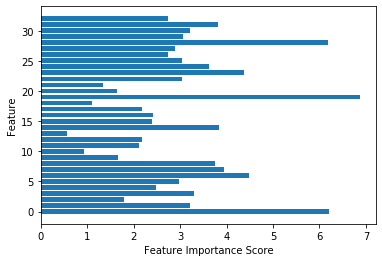

In [64]:
def plot_feature_importances_X(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks=(np.arange(n_features), df.columns)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Feature')
    
plot_feature_importances_X(ctb)
    

In [43]:
'''for pickle'''
with open ('MowopeMart1rfnow.pickle','wb') as f:
    pickle.dump(ctb, f)

In [47]:
'''we use this cell while testing on new data after we have written pickle'''
'''to read the pickle'''
pickle_in = open('MowopeMart1rfnow.pickle','rb')
'''we renamed classifier here'''
ctb = pickle.load(pickle_in)

In [45]:
#df_sol = pd.DataFrame(ctb.predict(x))#converting prediction to a dataframe
df_sol=ctb.predict_proba(x)[:, 1]
print(df_sol)
print(len(df_sol))
#print(df_sol_proba)

[0.16838516 0.48258375 0.28568059 ... 0.39304259 0.63251598 0.24596293]
24000


In [46]:
df_sample2=df_sample.copy()
df_sample2['default_status']=df_sol
df_sample2.to_csv('MowopeMart1rfnow.csv', index=False) 